### Домашнее задание №10 по курсу "Машинное обучение"
Головач Андрей

### Задание 1

Minimal validation error is 0.05934065934065934 for k = 14
Appropriate test error is 0.3333333333333333


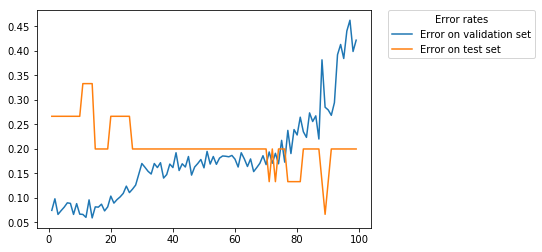

In [7]:
import csv
import operator
import math
import numpy
import matplotlib.pyplot as plt

def load_dataset(filename, split):
    with open(filename, 'r') as csvfile:
        lines = csv.reader(csvfile)
        dataset = list(lines)
        numpy.random.shuffle(dataset)
        for i in range(len(dataset)):
            for j in range(4):
                dataset[i][j] = float(dataset[i][j])

    training_set_length = int(len(dataset) * split)
    return (normalize(dataset[:training_set_length]), normalize(dataset[training_set_length:]))


def distance(instance1, instance2, length):
    distance = 0
    for x in range(length - 1):
        distance += pow((float(instance1[x]) - float(instance2[x])), 2)
    return math.sqrt(distance)


def get_nearest_neighbors(training_set, test_instance, k):
    distances = []
    length = len(test_instance)-1

    for x in range(len(training_set)):
        dist = distance(test_instance, training_set[x], length)
        distances.append((training_set[x], dist))

    distances.sort(key=operator.itemgetter(1))
    neighbors = []
    for x in range(k):
        neighbors.append(distances[x][0])

    return neighbors


def get_prediction(neighbors):
    class_votes = {}
    for x in range(len(neighbors)):
        response = neighbors[x][-1]
        if response in class_votes:
            class_votes[response] += 1
        else:
            class_votes[response] = 1
    sorted_votes = sorted(class_votes.items(), key=operator.itemgetter(1), reverse=True)
    return sorted_votes[0][0]


def get_error_rate(test_set, predictions):
    error_rate = 0.0
    for test_instance, prediction in zip(test_set, predictions):
        error_rate += (prediction != test_instance[4])
    return error_rate / len(test_set)

def k_fold_tune(k, training_set, k_for_knn):
    numpy.random.shuffle(training_set)
    splits = numpy.array_split(training_set, k)
    train_risk = []
    validation_risk = []

    for t in range(k):
        validation_split = splits[t]
        train_split = numpy.concatenate(numpy.delete(splits, t))

        predictions=test(validation_split, train_split, k_for_knn)
        validation_risk.append(get_error_rate(validation_split, predictions))

    return sum(validation_risk) / k


def normalize(dataset):
    features, labels = [list(x[:4]) for x in dataset], [x[4] for x in dataset]
    features_array = numpy.array(features)
    features = list((features_array - features_array.min(0)) / features_array.ptp(0))
    return [list(x) + [y] for x,y in zip(features, labels)]


def test(test_set, training_set, k):
    predictions=[]
    for x in range(len(test_set)):
        neighbors = get_nearest_neighbors(training_set, test_set[x], k)
        result = get_prediction(neighbors)
        predictions.append(result)
    return predictions

if __name__ == "__main__":
    split = 0.9
    training_set, test_set = load_dataset('iris.data', split)

    validation_error_list={}
    test_error_list = {}

    for k_for_knn in range(1, 100):
        avg_validation_error = k_fold_tune(10, training_set, k_for_knn)

        predictions = test(test_set, training_set, k_for_knn)
        test_error = get_error_rate(test_set, predictions)

        validation_error_list[k_for_knn] = avg_validation_error
        test_error_list[k_for_knn] = test_error

    minimal_error_k = min(validation_error_list, key = lambda x: validation_error_list.get(x))
    
    print("Minimal validation error is {} for k = {}".format(validation_error_list[minimal_error_k], minimal_error_k))
    print("Appropriate test error is {}".format(test_error_list[minimal_error_k]))


    x = [i for i in range(1, 100)]
    y1 = list(validation_error_list.values())
    y2 = list(test_error_list.values())

    plt.plot(x, y1, label="Error on validation set")
    plt.plot(x, y2, label="Error on test set")
    
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title="Error rates")
    
    plt.show()

### Задание 2

Проблема "Проклятия размерности" состоит в том, что при увеличении размерноссти пространства размер обучающей выборки должен расти экспоненциально, так как при недостаточно большой обучающей выборке велика вероятность переобучения.
Для того, чтобы бороться с "проклятием размерности", как вариант, можно выбрать наиболее приоритетные характеристики изучаемых объектов и продолжить обучение уже в пространстве меньшей размерности.
Также для преодоления данной проблемы можно использовать кластеризацию и методы понижения размерности, такие, как multidimentional scaling, переводящий выборку в пространство меньшей размерности, сохраняя расстояния между объектами, с помощью матрицы расстояний. 